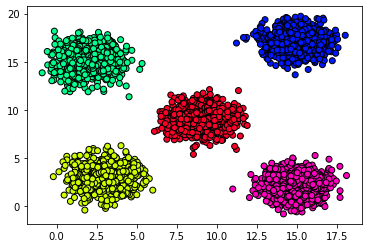

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from src.neuronal_network.perceptron import Perceptron, IdentityActivation, ReLU, SigmoidActivation
from src.common.vectorize import one_hot

n_classes = 5
num_4 = 1000
num_3 = 1000
num_2 = 1000
num_1 = 1000
num_0 = 1000
train_data = []
train_data.append(np.random.multivariate_normal((9, 9), ((1, 0), (0, 1)), size=num_0))
train_data.append(np.random.multivariate_normal((3, 3), ((1, 0), (0, 1)), size=num_1))
train_data.append(np.random.multivariate_normal((15, 2), ((1, 0), (0, 1)), size=num_2))
train_data.append(np.random.multivariate_normal((17, 15), ((1, 0), (0, 1)), size=num_3))
train_data.append(np.random.multivariate_normal((2, 15), ((1, 0), (0, 1)), size=num_4))
train_data = np.vstack(train_data)
train_min_y = train_data[:,0].min()
train_max_y = train_data[:,0].max()
train_min_x = train_data[:,1].min()
train_max_x = train_data[:,1].max()
train_labels = []
train_labels.append(np.repeat(0, num_0))
train_labels.append(np.repeat(1, num_1))
train_labels.append(np.repeat(2, num_2))
train_labels.append(np.repeat(3, num_3))
train_labels.append(np.repeat(4, num_4))
train_labels = np.hstack(train_labels)

cmap = plt.get_cmap('gist_rainbow')
_, ax = plt.subplots()
ax.scatter(train_data[:,1], train_data[:,0], c=cmap(train_labels/4), edgecolor='black')

Epochs: 51epoch [01:31,  1.79s/epoch]?, ?epoch/s]
Epochs: 51epoch [01:01,  1.03s/epoch]                     

Displaying: render/perceptron_classifier_2x5_2022-06-02 19:16:12.404888_ReLU_MSE.mp4


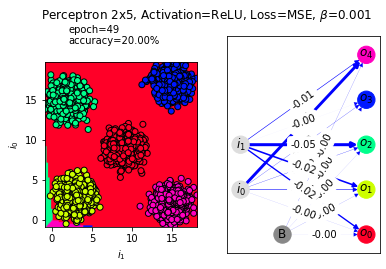

In [9]:
from src.common.plot import sample2DClassifier, plotWeightLayer
from matplotlib.animation import FuncAnimation
from IPython.display import Video
from datetime import datetime
import tqdm

batch_size = 5
epochs = 50
duration_ms = 15000
learning_rate = 0.001

perceptron = Perceptron(2, n_classes, learning_rate, activation=IdentityActivation())

fig, ax = plt.subplots(1,2)
fig.patch.set_color('white')
fig.suptitle(f"Perceptron 2x{n_classes}, Activation={perceptron.activation}" +
             f", Loss={perceptron.loss}, $\\beta$={learning_rate}")
ax[0].scatter(train_data[:,1], train_data[:,0], c=cmap(train_labels/4), edgecolors='black')
ax[0].set_ylim((train_min_y, train_max_y))
ax[0].set_xlim((train_min_x, train_max_x))
ax[0].set_ylabel('$i_0$')
ax[0].set_xlabel('$i_1$')
img = ax[0].imshow([[1]])
txt = ax[0].text(2, 22 ,"")

epochs_bar = tqdm.tqdm(desc="Epochs", unit="epoch", total=epochs, position=0, leave=True)

def epoch(i):
  perm = np.random.permutation(len(train_labels))
  data = train_data[perm]
  labels = train_labels[perm]

  batches = np.split(data, data.shape[0] / batch_size)
  batch_labels = np.split(labels, len(labels) / batch_size)


  
  sample2DClassifier(img, perceptron.classifyIx, cmap, train_min_y, train_max_y, train_min_x, train_max_x)
  accuracy = sum(perceptron.classifyIx(train_data) == train_labels) / len(train_labels)
  txt.set_text(f"epoch={i}\naccuracy={accuracy*100:02.02f}%")

  ax[1].clear()
  plotWeightLayer(ax[1], perceptron.linear_layer.weights, 2, 1.5, cmap, True)


  for batch, labels in zip(batches, batch_labels):
    vectorized_labels = one_hot(labels, n_classes)
    perceptron.train(batch, vectorized_labels)

  epochs_bar.update(1)
  return img, txt
    
anim = FuncAnimation(fig, epoch, interval=duration_ms/epochs, frames=epochs)
fname = f"render/perceptron_classifier_2x{n_classes}_{datetime.now()}_{perceptron.activation}_{perceptron.loss}.mp4"
anim.save(fname)
print(f"Displaying: {fname}")
Video(fname)